In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random

Exercise 2.5 (programming) Design and conduct an experiment to demonstrate the
diculties that sample-average methods have for nonstationary problems. Use a modified
version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take
independent random walks (say by adding a normally distributed increment with mean 0
and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2
for an action-value method using sample averages, incrementally computed, and another
action-value method using a constant step-size parameter, $\epsilon$ = 0.1. Use $\alpha$ = 0.1 and
longer runs, say of 10,000 steps.

In [21]:
EPSILON = 0.1
ALPHA = 0.1
STEPS = int(1e4)

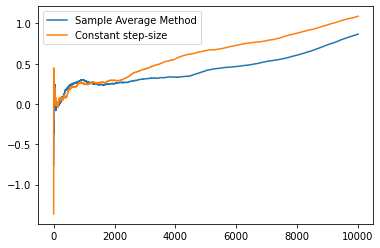

In [106]:
bandit_means = [0] * 10

Q_sa = [0] * 10
N_sa = [0] * 10
total_reward_sa = 0
reward_history_sa = []

Q_exp = [0] * 10
N_exp = [0] * 10
total_reward_exp = 0
reward_history_exp = []

for n in range(STEPS):
    
    # Sample Average Method
    if random.random() < EPSILON:
        action = random.randint(10)
        R = random.normal(bandit_means[action], 1)
    
    else:
        m = max(Q_sa)
        action = [i for i, j in enumerate(Q_sa) if j == m]
        action = random.choice(action)
        R = random.normal(bandit_means[action], 1)
    
    total_reward_sa += R
    reward_history_sa.append(total_reward_sa / (n + 1))
    
    # Update N and Q
    N_sa[action] += 1
    old_Q = Q_sa[action]
    Q_sa[action] += (1 / N_sa[action]) * (R - old_Q)
    
    
    # Constant step size
    if random.random() < EPSILON:
        action = random.randint(10)
        R = random.normal(bandit_means[action], 1)
        
    else:
        m = max(Q_exp)
        action = [i for i, j in enumerate(Q_exp) if j == m]
        action = random.choice(action)
        R = random.normal(bandit_means[action], 1)
    
    N_exp[action] += 1
    old_Q = Q_exp[action]
    Q_exp[action] += ALPHA * (R - old_Q)
    
    total_reward_exp += R
    reward_history_exp.append(total_reward_exp / (n + 1))
    
    # Randomly walk the means
    bandit_means = [x + random.normal(0, 0.01) for x in bandit_means]
    

plt.plot(reward_history_sa, label="Sample Average Method")
plt.plot(reward_history_exp, label="Constant step-size")
plt.legend()